In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from chart import show, show_collection
from skimage import data
from skimage.exposure import histogram

## Introduction

Refs.:
* https://scikit-image.org/docs/stable/auto_examples/data/plot_scientific.html#sphx-glr-auto-examples-data-plot-scientific-py
* https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html

### RGB image

object type: <class 'numpy.ndarray'>
pixel type: uint8
dims: (1411, 1411, 3)
size: 5972763 bytes


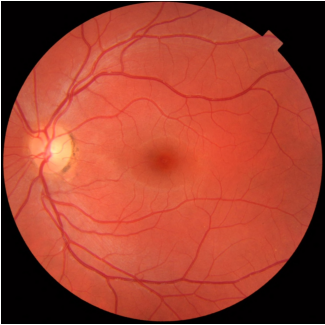

In [3]:
image = data.retina()
show(image, scale=0.03)
print(f"object type: {type(image)}")
print(f"pixel type: {image.dtype}")
print(f"dims: {image.shape}")
print(f"size: {image.size * image.itemsize} bytes")

Basic statistics

In [4]:
min_val = np.min(image)
max_val = np.max(image)
mean_val = np.mean(image)
std_dev = np.std(image)

print(f"minimum value: {min_val}")
print(f"maximum value: {max_val}")
print(f"mean value: {mean_val}")
print(f"standard deviation: {std_dev}")

minimum value: 0
maximum value: 255
mean value: 89.69798935601496
standard deviation: 76.58712337326638


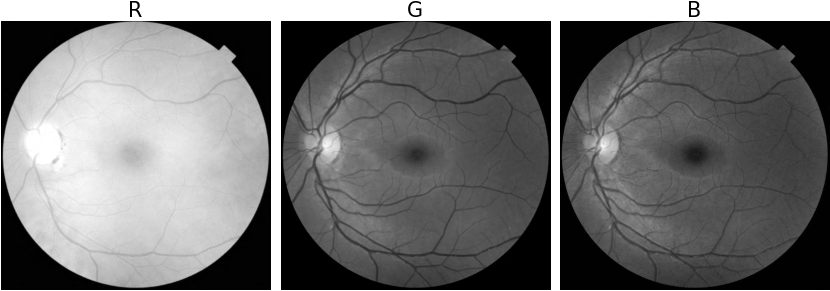

In [5]:
R, G, B = np.split(image, 3, axis=2)
show_collection([R, G, B], titles=["R", "G", "B"], scale=0.02, fontsize=15, cmap="gray")

### Grayscale image

$Y = 0.2125 R + 0.7154 G + 0.0721 B$

object type: <class 'numpy.ndarray'>
pixel type: float64
dims: (1411, 1411)
size: 15927368 bytes


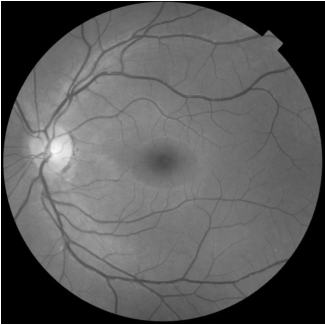

In [6]:
from skimage.color import rgb2gray

gray = rgb2gray(image)
show(gray, scale=0.03, cmap="gray")
print(f"object type: {type(gray)}")
print(f"pixel type: {gray.dtype}")
print(f"dims: {gray.shape}")
print(f"size: {gray.size * gray.itemsize} bytes")


Basic statistics

In [7]:
# print the statistics report
print("Image Statistics Report:")
print("- Mean Value: {:.2f}".format(np.mean(gray)))
print("- Median Value: {:.2f}".format(np.median(gray)))
print("- Standard Deviation: {:.2f}".format(np.std(gray)))
print("- Minimum Value: {:.2f}".format(np.min(gray)))
print("- Maximum Value: {:.2f}".format(np.max(gray)))

Image Statistics Report:
- Mean Value: 0.32
- Median Value: 0.39
- Standard Deviation: 0.19
- Minimum Value: 0.00
- Maximum Value: 0.92


### Histogram
Grayscale

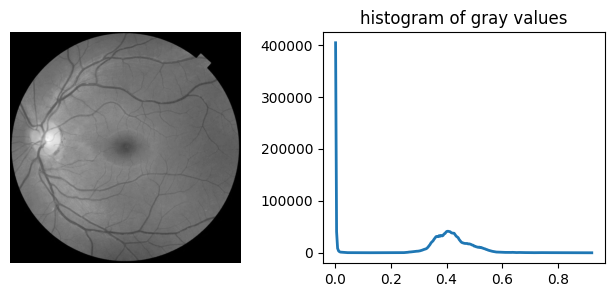

In [58]:
hist, hist_centers = histogram(gray)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(gray, cmap="gray")
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')
plt.show()

Now, let us crop a central ROI (region-of-interest) to exclude the black background.

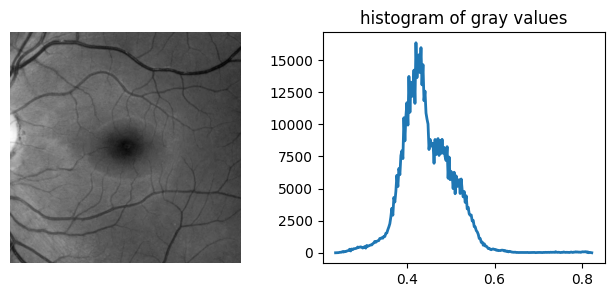

In [107]:
h, w = gray.shape # height, width
dy = int(0.2 * h)
dx = int(0.2 * w)
cropped = gray[dy : -dy, dx : -dx] # equivalent to gray[dy : h - dy, dx : w - dx] 
hist, hist_centers = histogram(cropped)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(cropped, cmap="gray")
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')
plt.show()

RGB

First, we crop the central ROI.

shape of histogram: (3, 244)


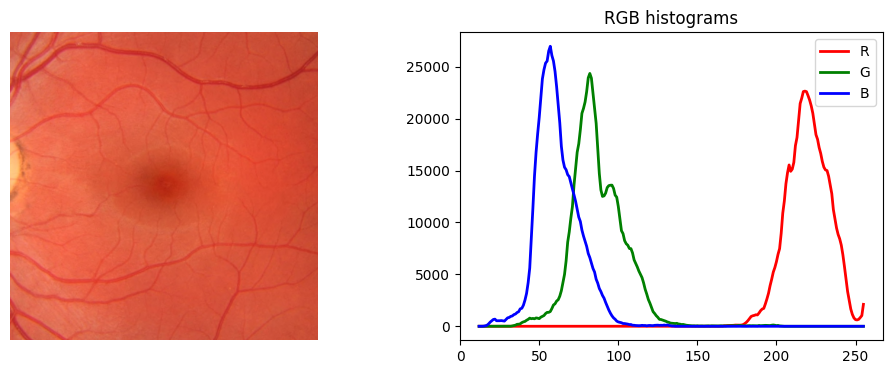

In [112]:
h, w, d = image.shape # height, width, depth
dy = int(0.2 * h)
dx = int(0.2 * w)
cropped = image[dy : -dy, dx : -dx] # equivalent to gray[dy : h - dy, dx : w - dx, :] 

hist, hist_centers = histogram(cropped, channel_axis=2)
print(f"shape of histogram: {hist.shape}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=100)
axes[0].imshow(cropped)
axes[0].axis('off')
axes[1].plot(hist_centers, hist[0], lw=2, label="R", color="red")
axes[1].plot(hist_centers, hist[1], lw=2, label="G", color="green")
axes[1].plot(hist_centers, hist[2], lw=2, label="B", color="blue")

axes[1].set_title('RGB histograms')
plt.legend()
plt.show()